In [33]:
import os
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [5]:
filename = os.path.join(os.getcwd(), "customer_purchase_data.csv")
df = pd.read_csv(filename)
df.shape
df.head(5)
print(list(df.columns))

"""
the target variable is purchase status

features that will be used:
  - age
  - annual income
  - number of purchases
  - time spent on website
  - discounts availed

"""

['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory', 'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed', 'PurchaseStatus']


'\nthe target variable is purchase status \n\nfeatures that will be used: \n  - age\n  - annual income\n  - number of purchases\n  - time spent on website\n  - discounts availed\n\n'

Cleaning the data

* find the outliers and winsorize them
* handle missing data

In [12]:
nan_count = np.sum(df.isnull(), axis=0)
nan_count

nan_detected = nan_count != 0
nan_detected

Age                   False
Gender                False
AnnualIncome          False
NumberOfPurchases     False
ProductCategory       False
TimeSpentOnWebsite    False
LoyaltyProgram        False
DiscountsAvailed      False
PurchaseStatus        False
dtype: bool

In [17]:
y = df['PurchaseStatus']

list_features_dont_want = ['Gender', 'ProductCategory', 'LoyaltyProgram', 'PurchaseStatus']
X = df[[col for col in df.columns if col not in list_features_dont_want]]
print(str(list(X.columns)))
print("\nNumber of examples: " + str(X.shape[0]))
print("\nNumber of features: " + str(X.shape[1]))

['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']

Number of examples: 1500

Number of features: 5


* Create training and test data sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=123)

print("dimensions of training data set:", X_train.shape)
print("dimensions of testing data set:",X_test.shape)

dimensions of training data set: (1005, 5)
dimensions of testing data set: (495, 5)


# Train Decision Tree Classifiers and Evaluate the Performance

In [34]:
def train_test_dt(X_train, X_test, y_train, y_test, depth, leaf=1, crit='entropy'):
  model = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_leaf=leaf)
  model.fit(X_train,y_train)
  class_label_predictions = model.predict(X_test)
  acc_score = accuracy_score(y_test, class_label_predictions)
  return acc_score


* Use the train_test_dt function to train 2 decision trees with different max depths

In [35]:
accuracy_list = []
max_depth_range = [8,32]
for maxdepth in max_depth_range:
  score = train_test_dt(X_train, X_test, y_train, y_test, maxdepth)
  print('Max Depth:' + str(maxdepth) + ', accuracy score: ' + str(score))
  accuracy_list.append(float(score))

Max Depth:8, accuracy score: 0.8101010101010101
Max Depth:32, accuracy score: 0.7757575757575758


* Visualize Accuracy to plot the hyperparameter value

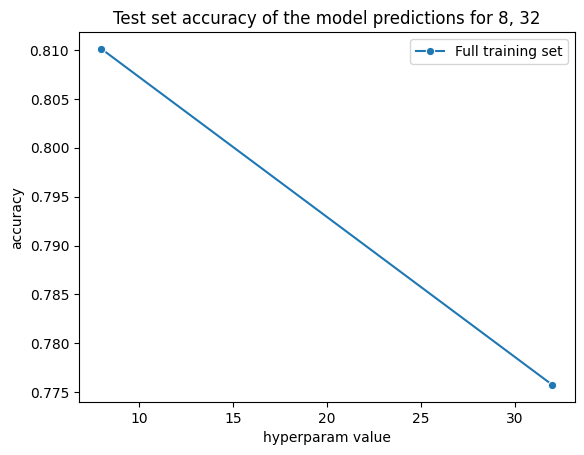

In [38]:
def visualize_accuracy(hyperparam_range, acc):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  p = sns.lineplot(x=hyperparam_range, y=acc, marker='o', label='Full training set')
  plt.title('Test set accuracy of the model predictions for ' + ', '.join([str(h) for h in hyperparam_range]))
  ax.set_xlabel('hyperparam value')
  ax.set_ylabel('accuracy')
  plt.show()
visualize_accuracy(max_depth_range, accuracy_list)

* Analysis: higher accuracy with lower parameter values

* Now train 6 different decision trees with max depths: 1,2,4,8,16,32

Max Depth=1, accuracy score: 0.6525252525252525
Max Depth=2, accuracy score: 0.7171717171717171
Max Depth=4, accuracy score: 0.8121212121212121
Max Depth=8, accuracy score: 0.8121212121212121
Max Depth=16, accuracy score: 0.7717171717171717
Max Depth=32, accuracy score: 0.7818181818181819


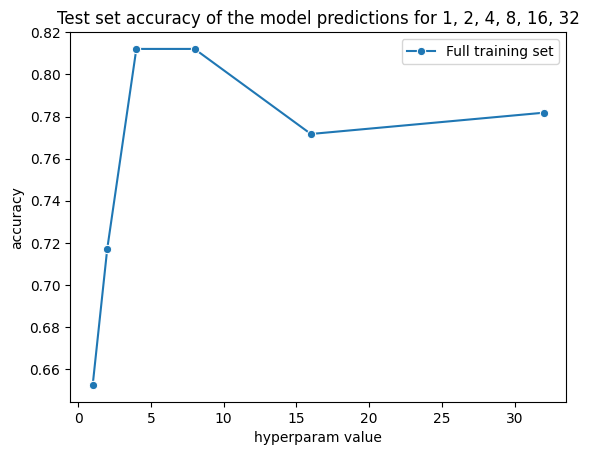

In [40]:
accuracy_list = []
max_depth_range = [2**i for i in range(6)]
for maxdepth in max_depth_range:
  score = train_test_dt(X_train, X_test, y_train, y_test, maxdepth)
  print('Max Depth=' + str(maxdepth) + ', accuracy score: ' + str(score))
  accuracy_list.append(float(score))
visualize_accuracy(max_depth_range, accuracy_list)

* Analysis: best model configuration is the one with the value of max depth that produces highest accuracy score
* The highest accuracy score (about 0.81) is when the hyperparameter value between 4-8

## Train with KNN Classifier and Evaluate Performance

In [44]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  class_label_predictions = model.predict(X_test)
  acc_score = accuracy_score(y_test, class_label_predictions)
  return acc_score

In [45]:
accuracy_list=[]
k_range = [3, 30, 300]
for k in k_range:
  score = train_test_knn(X_train, X_test, y_train, y_test, k)
  print('k=' + str(k) + ',accuracy score: ' + str(score))
  accuracy_list.append(float(score))

k=3,accuracy score: 0.5757575757575758
k=30,accuracy score: 0.6101010101010101
k=300,accuracy score: 0.6121212121212121


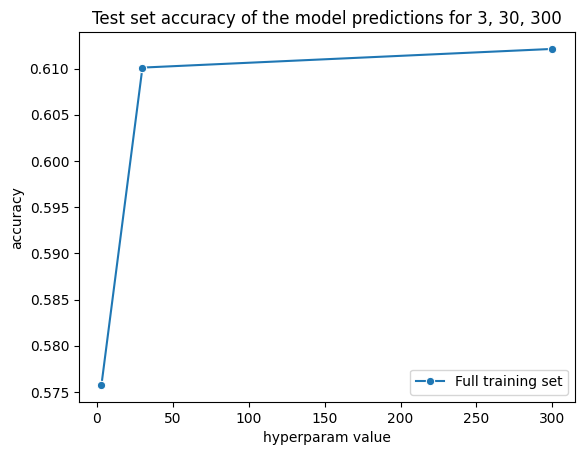

In [46]:
visualize_accuracy(k_range, accuracy_list)

* Analysis: Higher accuracy occurs when the hyperparameter values are higher -- try more hyperparamter values above 300+

In [48]:
k_range = np.arange(300,400, step = 10)
k_range

array([300, 310, 320, 330, 340, 350, 360, 370, 380, 390])

k=300, accuracy score: 0.6121212121212121
k=310, accuracy score: 0.6282828282828283
k=320, accuracy score: 0.6242424242424243
k=330, accuracy score: 0.6222222222222222
k=340, accuracy score: 0.6141414141414141
k=350, accuracy score: 0.6101010101010101
k=360, accuracy score: 0.6141414141414141
k=370, accuracy score: 0.6101010101010101
k=380, accuracy score: 0.602020202020202
k=390, accuracy score: 0.6


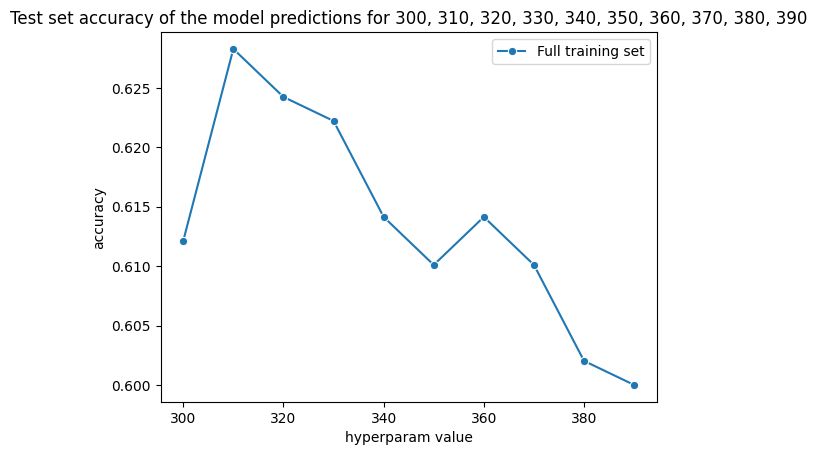

In [49]:
accuracy_list=[]
for k in k_range:
  score = train_test_knn(X_train, X_test, y_train, y_test,k)
  print('k=' + str(k) + ', accuracy score: ' + str(score))
  accuracy_list.append(float(score))
visualize_accuracy(k_range, accuracy_list)

* Analysis: Peak accuracy hits at hyperparameter value of 310 then decreases rapidly as the hyperparam value increases

# FINAL COMPARISON & ANALYSIS
**
Comparing the performance of a Decision Tree Model and a KNN model, it is clear that the Decision Tree Model performs substantially better than a KNN for this dataset

Decision Tree with the max depth of 4 performed the best.

KNN with K=310 performed the best.
**